<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#데이터-생성" data-toc-modified-id="데이터-생성-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>데이터 생성</a></span><ul class="toc-item"><li><span><a href="#Prophet-라이브러리-사용" data-toc-modified-id="Prophet-라이브러리-사용-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Prophet 라이브러리 사용</a></span><ul class="toc-item"><li><span><a href="#전체-시계열로-예측" data-toc-modified-id="전체-시계열로-예측-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>전체 시계열로 예측</a></span><ul class="toc-item"><li><span><a href="#날짜와-Y값으로만-예측" data-toc-modified-id="날짜와-Y값으로만-예측-1.1.1.1"><span class="toc-item-num">1.1.1.1&nbsp;&nbsp;</span>날짜와 Y값으로만 예측</a></span></li></ul></li><li><span><a href="#요일별-데이터로-예측" data-toc-modified-id="요일별-데이터로-예측-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>요일별 데이터로 예측</a></span></li></ul></li><li><span><a href="#ARIMA-사용하기" data-toc-modified-id="ARIMA-사용하기-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>ARIMA 사용하기</a></span><ul class="toc-item"><li><span><a href="#전체-시계열-데이터-정상성-체크" data-toc-modified-id="전체-시계열-데이터-정상성-체크-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>전체 시계열 데이터 정상성 체크</a></span></li><li><span><a href="#요일별-데이터-정상성-체크" data-toc-modified-id="요일별-데이터-정상성-체크-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>요일별 데이터 정상성 체크</a></span></li><li><span><a href="#Auto-ARIMA로-적합-및-예측" data-toc-modified-id="Auto-ARIMA로-적합-및-예측-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Auto ARIMA로 적합 및 예측</a></span></li></ul></li><li><span><a href="#머신러닝-회귀-모델" data-toc-modified-id="머신러닝-회귀-모델-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>머신러닝 회귀 모델</a></span><ul class="toc-item"><li><span><a href="#기본적인-데이터-전처리" data-toc-modified-id="기본적인-데이터-전처리-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>기본적인 데이터 전처리</a></span></li><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Linear Regression</a></span><ul class="toc-item"><li><span><a href="#전체-시계열-데이터로-예측" data-toc-modified-id="전체-시계열-데이터로-예측-1.3.2.1"><span class="toc-item-num">1.3.2.1&nbsp;&nbsp;</span>전체 시계열 데이터로 예측</a></span></li><li><span><a href="#요일별로-예측" data-toc-modified-id="요일별로-예측-1.3.2.2"><span class="toc-item-num">1.3.2.2&nbsp;&nbsp;</span>요일별로 예측</a></span></li></ul></li></ul></li></ul></li></ul></div>

# 데이터 생성

- 전체 시계열로 예측
    * 요일에 가중치 파생변수 두기
    * 모델 종류
        - Prophet : 결측치 제거하지 않아도 됨
        - ARIMA : 매출액에 대한 정상성 확보
        - 머신러닝 회귀모델
        - 딥러닝 RNN 모델
- 요일 시계열로 예측
    * 요일별로 데이터프레임 나누기
    * 요일별로 모델 생성

In [24]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings(action='ignore')
os.chdir('/Users/younghun/Desktop/gitrepo/data/woochuri/')

In [148]:
df = pd.read_csv('./woochuri_final_data.csv')

## Prophet 라이브러리 사용
### 전체 시계열로 예측
- 결측치 제거하지 않아도 됨
- 원래는 날짜, Y값 변수만 넣지만 독립변수 추가는 가능함. 하지만 추가하면 미래의 Y값을 예측하기 위해 직전의 Y값을 쓰는 것이 아닌 추가된 독립변수만을 사용..

#### 날짜와 Y값으로만 예측

In [3]:
from fbprophet import Prophet

In [4]:
fb_df = df[['날짜', '일매출']]
# 일매출이 0인 값은 결측치로 다시 바꾸기
fb_df['일매출'] = fb_df['일매출'].replace(0, np.nan)
fb_df.isnull().sum()

날짜      0
일매출    86
dtype: int64

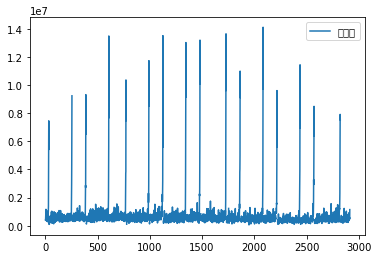

In [5]:
# 간단하게 시각화해보기
from matplotlib import pyplot
fb_df.plot()
pyplot.rc('font', family='AppleGothic')
pyplot.rcParams['axes.unicode_minus'] = False
pyplot.show()

In [6]:
# Split train, test data
splits = int(fb_df.shape[0] * 0.8)
train_df = fb_df.iloc[0: splits]
test_df = fb_df.iloc[splits:]
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

Train shape: (2332, 2)
Test shape: (583, 2)


In [7]:
# 칼럼명 날짜는 'ds'로 일매출은 'y'로 바꾸자
train_df.columns = ['ds', 'y']
test_df.columns = ['ds', 'y']
# 'ds' datetime type으로 바꾸기
train_df['ds'] = pd.to_datetime(train_df['ds'])
test_df['ds'] = pd.to_datetime(test_df['ds'])

In [8]:
# 모델 정의
model = Prophet()
# Train데이터로 학습
model.fit(train_df)

# Test데이터의 'ds'로 모델 평가
forecast = model.predict(test_df[['ds']])
test_df['y_pred'] = forecast['yhat'].values

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [9]:
from sklearn.metrics import mean_absolute_error
test = test_df.dropna()
mae = mean_absolute_error(test['y'], test['y_pred'])
print("MAE:", mae)

MAE: 389379.4545916285


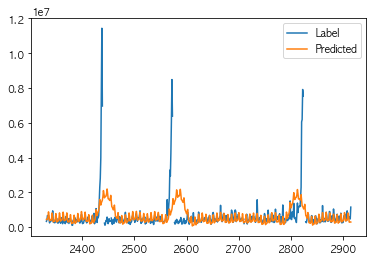

In [10]:
pyplot.plot(test_df['y'], label='Label')
pyplot.plot(test_df['y_pred'], label='Predicted')
pyplot.legend()
pyplot.show()

- 아무리 Holiday 요소를 고려한다 해도 추석, 설날 주변의 특이 이상치를 예측하지 못한다..

In [11]:
# 이상치를 제거하고 예측해보자
out_fb_df = df.loc[df['설_추석_가중치'] == 0, ['날짜', '일매출']]
splits = int(fb_df.shape[0] * 0.8)
train_df = out_fb_df.iloc[:splits]
test_df = out_fb_df.iloc[splits:]

train_df.columns = ['ds', 'y']
test_df.columns = ['ds', 'y']
train_df['ds'] = pd.to_datetime(train_df['ds'])
test_df['ds'] = pd.to_datetime(test_df['ds'])

In [12]:
# 모델 정의, 학습
model = Prophet()
model.fit(train_df)

# Test 데이터에 대해 모델 예측
forecast = model.predict(test_df[['ds']])
test_df['y_pred'] = forecast['yhat'].values

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [13]:
test = test_df.dropna()
mae = mean_absolute_error(test['y'], test['y_pred'])
print("MAE:", mae)

MAE: 254080.33156528362


### 요일별 데이터로 예측

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Friday의 MAE: 433185.66


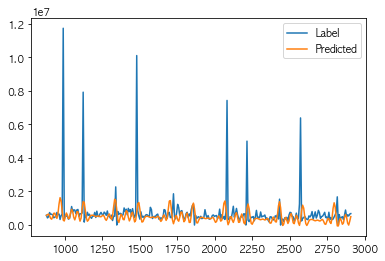

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


--------------------------------------------------
Monday의 MAE: 352026.29


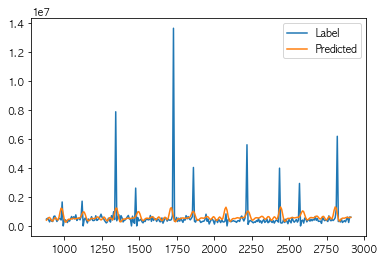

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


--------------------------------------------------
Saturday의 MAE: 794679.53


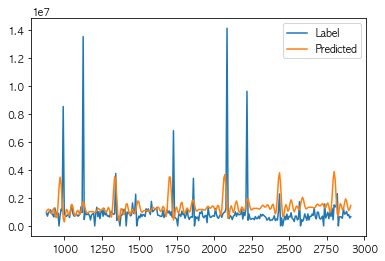

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


--------------------------------------------------
Sunday의 MAE: 965775.53


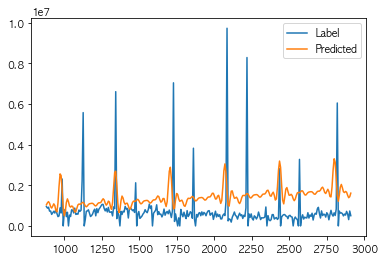

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


--------------------------------------------------
Thursday의 MAE: 359964.51


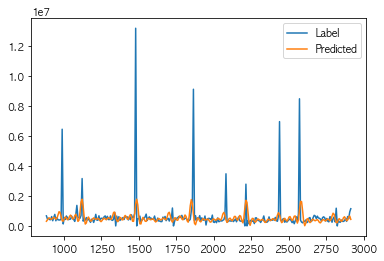

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


--------------------------------------------------
Tuesday의 MAE: 622067.25


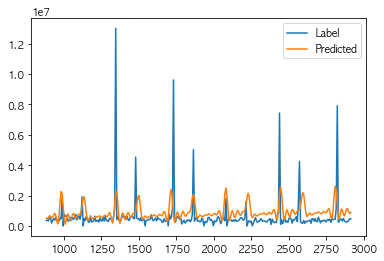

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


--------------------------------------------------
Wednesday의 MAE: 423828.94


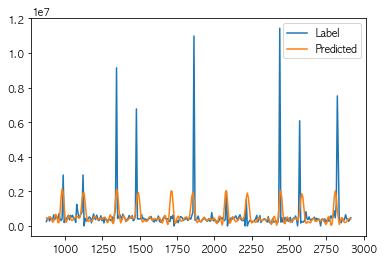

--------------------------------------------------


In [14]:
import math
fb_df = df[['날짜', '일매출', '요일']]
grouped = fb_df.groupby('요일')
weekday_lst = list(grouped.groups.keys())
for i, g in enumerate(grouped.groups):
    group = grouped.get_group(g)
    group = group[['날짜', '일매출']]
    group.columns = ['ds', 'y']

    splits = math.ceil(group.shape[0] * 0.3)
    train_df = group.iloc[:splits]
    test_df = group.iloc[splits:]
    # 모델 정의
    model = Prophet()
    model.fit(train_df)
    # 모델 평가
    forecast = model.predict(test_df[['ds']])
    test_df['y_pred'] = forecast['yhat'].values
    # 모델 성능 측정
    mae = mean_absolute_error(test_df['y'], test_df['y_pred'])
    print(f"{weekday_lst[i]}의 MAE: {mae :.2f}")
    pyplot.plot(test_df['y'], label='Label')
    pyplot.plot(test_df['y_pred'], label='Predicted')
    pyplot.legend()
    pyplot.show()
    print('-'*50)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Friday의 MAE: 223465.77


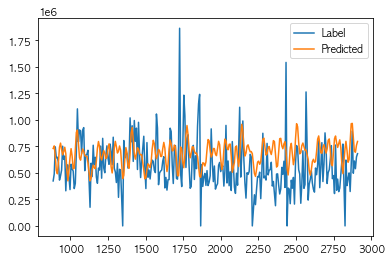

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


--------------------------------------------------
Monday의 MAE: 274909.42


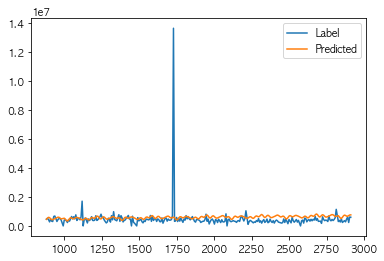

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


--------------------------------------------------
Saturday의 MAE: 371460.66


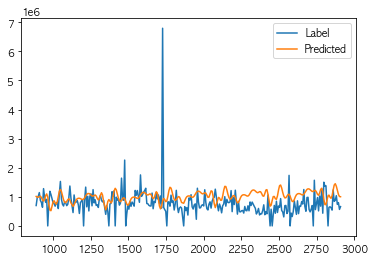

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


--------------------------------------------------
Sunday의 MAE: 390815.21


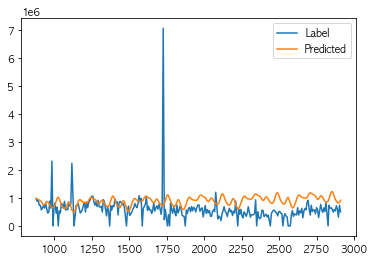

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


--------------------------------------------------
Thursday의 MAE: 233623.97


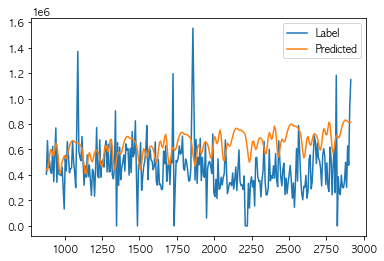

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


--------------------------------------------------
Tuesday의 MAE: 287527.86


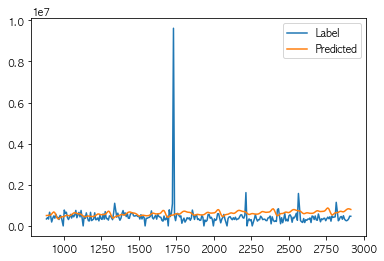

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


--------------------------------------------------
Wednesday의 MAE: 149924.24


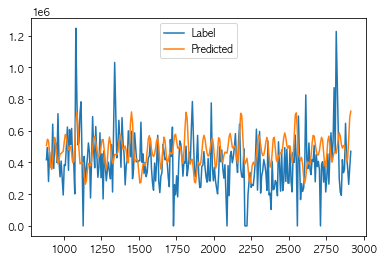

--------------------------------------------------


In [15]:
# 이상치 데이터를 제거하고 재시도
import math
fb_df = df.loc[df['설_추석_가중치'] == 0, ['날짜', '일매출', '요일']]
grouped = fb_df.groupby('요일')
weekday_lst = list(grouped.groups.keys())
for i, g in enumerate(grouped.groups):
    group = grouped.get_group(g)
    group = group[['날짜', '일매출']]
    group.columns = ['ds', 'y']

    splits = math.ceil(group.shape[0] * 0.3)
    train_df = group.iloc[:splits]
    test_df = group.iloc[splits:]
    # 모델 정의
    model = Prophet()
    model.fit(train_df)
    # 모델 평가
    forecast = model.predict(test_df[['ds']])
    test_df['y_pred'] = forecast['yhat'].values
    # 모델 성능 측정
    mae = mean_absolute_error(test_df['y'], test_df['y_pred'])
    print(f"{weekday_lst[i]}의 MAE: {mae :.2f}")
    pyplot.plot(test_df['y'], label='Label')
    pyplot.plot(test_df['y_pred'], label='Predicted')
    pyplot.legend()
    pyplot.show()
    print('-'*50)

- 전체 시계열보다 요일별 모델이 더 에러값이 적다
- 추석_설_가중치가 있는 값들 즉, 설,추석 연휴 매출이 높은 값들을 제거하는 것이 오히려 더 정확했다..하지만 이렇게 하면 미래에 맞이할 설,추석 연휴 매출을 예측하기가 어려워짐..

In [16]:
# 어떻게 개선해야 할까.. 생각좀해보자...
# Prophet을 더 개선해야 하는지
# ARIMA는 보나마나 못맞출 것 같고..
# 머신러닝, 딥러닝을 사용해야 하나..
# 데이터가 적다보니 앙상블 모델을 하는 것도 좋을 듯 하다..

## ARIMA 사용하기
- 우선 일매출값의 정상성 확보
- 결측치 없애야 함 => 일매출값이 0인 값들 제외
- AR, MA 차수 범위 확인 후 Auto Arima 적용

### 전체 시계열 데이터 정상성 체크

In [149]:
# 일매출이 0인 값들 제외
print("제거하기 전 shape:", df.shape)
df = df[df['일매출'] != 0]

print("제거한 후 shape:", df.shape)

제거하기 전 shape: (2915, 18)
제거한 후 shape: (2829, 18)


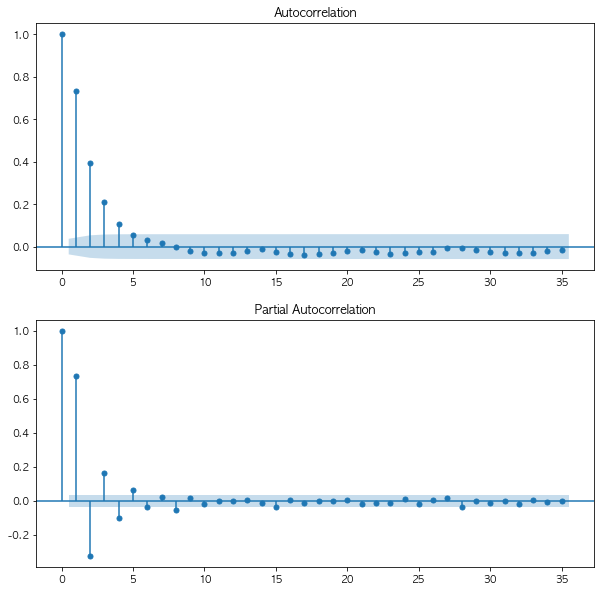

In [150]:
# ACF, PACF 그래프 그려보기
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(figsize=(10, 10), nrows=2, ncols=1, squeeze=True)
plot_acf(df['일매출'], ax=axes[0])
plot_pacf(df['일매출'], ax=axes[1])
plt.show()

- 일반 AR,MA 차수 체크
    - ACF 함수 그래프에서 파란색 부분을 튀어나온 개수만큼 MA 수행
        * 0번 ~ 3번 또는 4번
    - PACF 함수 그래프에서 파란색 부분을 튀어나온 개수만큼 AR 수행
        * 0번 ~ 3번 또는 4번
<br><br>
- 계절성 AR,MA 차수 체크(lag=4의 배수일 때의 막대를 확인!)
    - ACF 함수 그래프에서 lag=4일 때 튀어나온 막대 개수만큼 MA 수행
        * 0번 ~ 1번
    - PACF 함수 그래프에서 lag=4일 때 튀어나온 막대 개수만큼 AR 수행
        * 0번 ~ 1번


In [132]:
# 해당 시계열 데이터의 정상성 통계적 검정하기
# 1. KPSS 검정 - 귀무가설 : 해당 시계열 데이터는 정상성이다.
from statsmodels.tsa.stattools import kpss
stats, p_value, n_lags, c_values = kpss(df['일매출'])

print("KPSS 검정통계량:", stats)
print("P-value:", p_value)

if p_value < 0.05:
    print("귀무가설을 기각! 즉, 해당 데이터는 비정상성이다!")
else:
    print("귀무가설을 채택! 즉, 해당 데이터는 정상성이다!")

KPSS 검정통계량: 1.007966066438297
P-value: 0.01
귀무가설을 기각! 즉, 해당 데이터는 비정상성이다!


In [133]:
# ADFuller Test도 수행 - 귀무가설 : 해당 시계열 데이터는 비정상성이다.
from statsmodels.tsa.stattools import adfuller

res = adfuller(df['일매출'])
print("ADFuller 검정통계량:", res[0])
print("P-value:", res[1])

if res[1] < 0.05:
    print("귀무가설을 기각! 즉, 해당 데이터는 정상성이다!")
else:
    print("귀무가설을 채택! 즉, 해당 데이터는 비정상성이다!")

ADFuller 검정통계량: -8.351044359416404
P-value: 2.994172105603451e-13
귀무가설을 기각! 즉, 해당 데이터는 정상성이다!


- **일매출 전체 시계열 데이터는 정상성이다!**

### 요일별 데이터 정상성 체크

In [134]:
# KPSS, ADFuller 둘다 테스트하는 함수 정의
def check_stationary(df):
    # test
    kpss_res = kpss(df['일매출'])
    adf_res = adfuller(df['일매출'])
    
    # KPSS
    if kpss_res[1] < 0.05:
        print("KPSS - 귀무가설을 기각! 즉, 해당 데이터는 정상성이다!")
    else:
        print("KPSS - 귀무가설을 채택! 즉, 해당 데이터는 비정상성이다!")
    
    # ADFuller
    if adf_res[1] < 0.05:
        print("ADFuller - 귀무가설을 기각! 즉, 해당 데이터는 비정상성이다!")
    else:
        print("ADFuller - 귀무가설을 채택! 즉, 해당 데이터는 정상성이다!")    

# Friday 일매출 데이터 정상성 체크
KPSS - 귀무가설을 기각! 즉, 해당 데이터는 정상성이다!
ADFuller - 귀무가설을 기각! 즉, 해당 데이터는 비정상성이다!


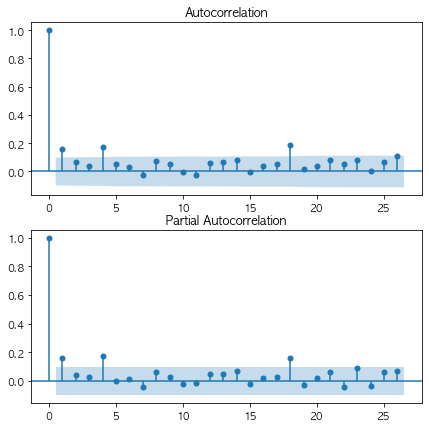

--------------------------------------------------
# Monday 일매출 데이터 정상성 체크
KPSS - 귀무가설을 채택! 즉, 해당 데이터는 비정상성이다!
ADFuller - 귀무가설을 기각! 즉, 해당 데이터는 비정상성이다!


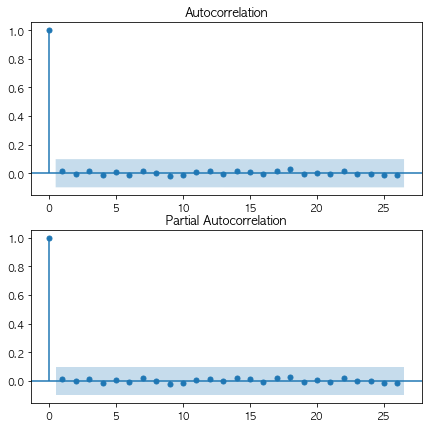

--------------------------------------------------
# Saturday 일매출 데이터 정상성 체크
KPSS - 귀무가설을 기각! 즉, 해당 데이터는 정상성이다!
ADFuller - 귀무가설을 기각! 즉, 해당 데이터는 비정상성이다!


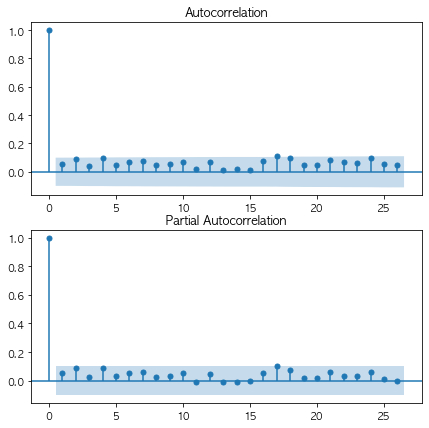

--------------------------------------------------
# Sunday 일매출 데이터 정상성 체크
KPSS - 귀무가설을 기각! 즉, 해당 데이터는 정상성이다!
ADFuller - 귀무가설을 기각! 즉, 해당 데이터는 비정상성이다!


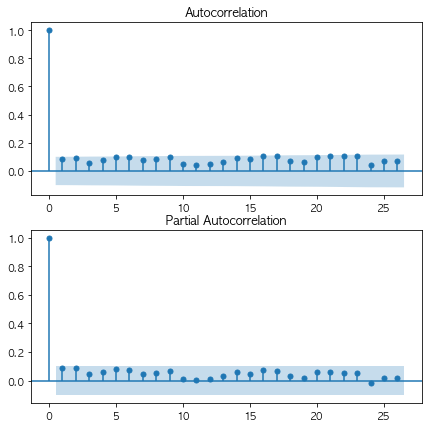

--------------------------------------------------
# Thursday 일매출 데이터 정상성 체크
KPSS - 귀무가설을 기각! 즉, 해당 데이터는 정상성이다!
ADFuller - 귀무가설을 기각! 즉, 해당 데이터는 비정상성이다!


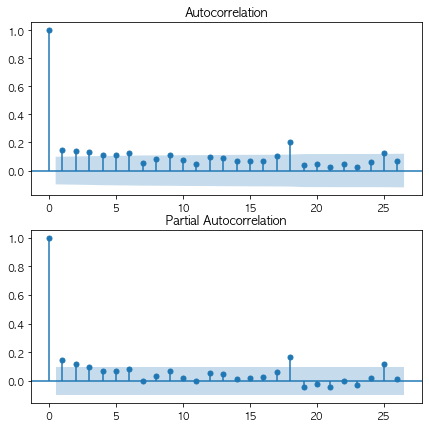

--------------------------------------------------
# Tuesday 일매출 데이터 정상성 체크
KPSS - 귀무가설을 채택! 즉, 해당 데이터는 비정상성이다!
ADFuller - 귀무가설을 기각! 즉, 해당 데이터는 비정상성이다!


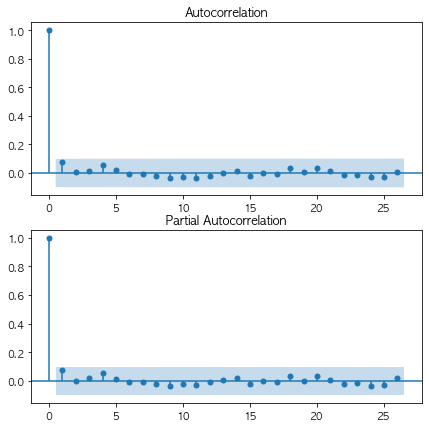

--------------------------------------------------
# Wednesday 일매출 데이터 정상성 체크
KPSS - 귀무가설을 기각! 즉, 해당 데이터는 정상성이다!
ADFuller - 귀무가설을 기각! 즉, 해당 데이터는 비정상성이다!


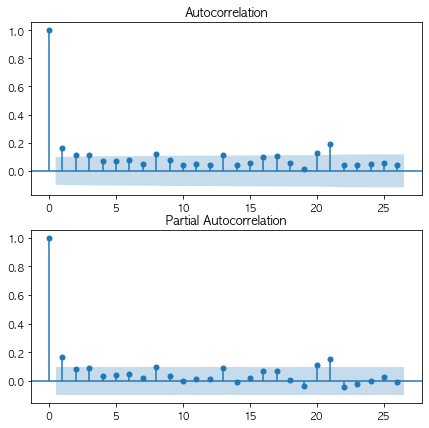

--------------------------------------------------


In [135]:
# 요일별 일매출 데이터 정상성 체크하고 ACF, PACF 함수 관찰후 대략적인 AR, MA 차수 결정하기
grouped = df.groupby('요일')
weekday_lst = list(grouped.groups.keys())

for i, g in enumerate(grouped.groups):
    group_df = grouped.get_group(g)
    print(f"# {weekday_lst[i]} 일매출 데이터 정상성 체크")
    check_stationary(group_df)
    fig, axes = plt.subplots(figsize=(7, 7), nrows=2, ncols=1, squeeze=True)
    plot_acf(group_df['일매출'], ax=axes[0])
    plot_pacf(group_df['일매출'], ax=axes[1])
    plt.show()
    print('-'*50)

- **요일별 일매출 데이터는 모든 요일에 대해 전부 데이터가 비정상성이다!**
- 따라서, ARIMA 모델링 시 **차분** 필요!
- 또한 요일별 ACF, PACF 그래프 관찰한 결과 모든 요일별 데이터에 대해 다음과 같은 AR, MA 차수 범위 얻음
    * AR : 0~1번
    * MA : 0~1번
- 참고로, 계절성 AR, MA 차수는 0번으로 해도 되는 것으로 관찰!

### Auto ARIMA로 적합 및 예측

In [151]:
from pmdarima.arima import auto_arima
import math

# split train, test data
splits = math.ceil(df.shape[0] * 0.8)
df['날짜'] = pd.to_datetime(df['날짜'])
df = df.set_index('날짜')

train = df['일매출'][:splits]
test = df['일매출'][splits:]
print("Train:", train.shape)
print("Test:", test.shape)

Train: (2264,)
Test: (565,)


In [152]:
# p = AR, q = MA, d = 차분
# 대문자 P,D,Q 파라미터는 계절적 요소알아보는 것!
# m = 계절 차분에 대한 periods 설정인데, daily=7로 설정!
arima_model = auto_arima(train, start_p=0, d=0, start_q=0,
                        max_p=4, max_d=1, max_q=4,
                        start_P=0, D=0, start_Q=0,
                        max_P=1, max_D=5, max_Q=1,
                        m=7, seasonal=True,
                        error_action='warn', trace=True,
                        stepwise=True, random_state=42)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=69713.872, Time=0.05 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=68020.593, Time=0.36 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=68165.733, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=70472.143, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=68019.425, Time=0.08 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=68020.598, Time=0.26 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=68022.586, Time=0.51 sec
 ARIMA(2,0,0)(0,0,0)[7] intercept   : AIC=67768.781, Time=0.13 sec
 ARIMA(2,0,0)(1,0,0)[7] intercept   : AIC=67768.636, Time=0.38 sec
 ARIMA(2,0,0)(1,0,1)[7] intercept   : AIC=67770.537, Time=0.58 sec
 ARIMA(2,0,0)(0,0,1)[7] intercept   : AIC=67768.551, Time=0.26 sec
 ARIMA(3,0,0)(0,0,1)[7] intercept   : AIC=67708.048, Time=0.33 sec
 ARIMA(3,0,0)(0,0,0)[7] intercept   : AIC=67706.810, Time=0.15 sec
 ARIMA(3,0,0)(1,0,0)[7] intercept   : AIC=67708.045, Time=0.53 sec
 ARIMA(3,0,0)(1,0,1

In [153]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 2264
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 7)   Log Likelihood              -33828.983
Date:                           Tue, 16 Mar 2021   AIC                          67669.965
Time:                                   16:37:46   BIC                          67704.315
Sample:                                        0   HQIC                         67682.499
                                          - 2264                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.401e+05   4.57e-07   5.26e+11      0.000     2.4e+05     2.4e+05
ar.L1          0.5025      0.008     66.676      0.000       0.488       0.517
ma.L1          0.5474      0.007     82.569      0.000       0.534       0.560
ar.S.L7        0.3511      0.082      4.260      0.000       0.190       0.513
ma.S.L7       -0.3208      0.090     -3.546      0.000      -0.498      -0.143
sigma2      5.691e+11   1.78e-12    3.2e+23      0.000    5.69e+11    5.69e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):            308591.71
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               1.15   Skew:                             4.78
Prob(H) (two-sided):                  0.05   Kurtosis:                        59.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.8e+37. Standard errors may be unstable.
"""

In [154]:
# Auto ARIMA 거쳐 나온 최적의 모델로 미래값 예측
test = pd.DataFrame(test.values, columns=['y'], index=test.index)
test['y_pred'] = arima_model.predict(n_periods=test.shape[0])

# MAE 결과확인
from sklearn.metrics import mean_squared_error
mae = mean_squared_error(test_df['y'], test_df['y_pred'])
print("MAE:", mae)

MAE: 1037670022949.046


## 머신러닝 회귀 모델

- 우선 전체 시계열로 예측하는 것이 더 나은지 요일 시계열로 예측하는 것이 더 나은지 살펴보기

### 기본적인 데이터 전처리

In [192]:
# 현재 육구가격 > 한우가격인 잘못된 데이터는 삭제된 상태
df = pd.read_csv('./woochuri_final_data.csv')
print(df.shape)

(2915, 18)


In [193]:
# 종속변수로서 다음날 매출 데이터 pull하기
df['target'] = np.append(np.array(df['일매출'][1:]), 0)
# 마지막 행인 Target이 0인 데이터제외하기
df = df[df['target'] != 0]

In [244]:
# 전체 시계열용 데이터
# 요일별 매출 평균치에 따라 가중치 부여(analysis.ipynb에 있음) => 표준화 scaler 적용해서 0~1
all_time = df.copy()
mean_sale_sum = all_time.groupby('요일')['일매출'].mean().sum()
weekday_group = pd.DataFrame(all_time.groupby('요일')['일매출'].mean())
weekday_group['요일가중치'] = np.round((weekday_group['일매출'] / mean_sale_sum) * 100, 2)

idx = weekday_group.index
value = weekday_group['요일가중치']
weekday_map = dict(zip(list(idx), list(value)))

all_time['요일'] = all_time['요일'].map(weekday_map)
all_time.head(2)

,날짜,요일,일매출,설_추석_가중치,일반공휴일가중치,한우가격,육우가격,돼지탕박가격,평균상대습도,최소상대습도,평균기온,최고기온,최저기온,평균풍속,최대풍속,일사량,1시간최다일사량,일강수량,target
0,2013-01-07,11.80,422400,0,0,14548.0,9169.0,3140.0,66.4,32.0,-5.0,1.0,-10.7,1.0,2.7,10.99,2.06,0.0,461900
1,2013-01-08,12.72,461900,0,0,15082.0,8105.0,3024.0,68.0,43.0,-4.2,1.9,-9.2,1.1,3.0,11.16,1.87,0.0,492500


In [245]:
# 요일별 시계열용 데이터
weekday_time = df.copy()
weekday_time.head(2)

,날짜,요일,일매출,설_추석_가중치,일반공휴일가중치,한우가격,육우가격,돼지탕박가격,평균상대습도,최소상대습도,평균기온,최고기온,최저기온,평균풍속,최대풍속,일사량,1시간최다일사량,일강수량,target
0,2013-01-07,Monday,422400,0,0,14548.0,9169.0,3140.0,66.4,32.0,-5.0,1.0,-10.7,1.0,2.7,10.99,2.06,0.0,461900
1,2013-01-08,Tuesday,461900,0,0,15082.0,8105.0,3024.0,68.0,43.0,-4.2,1.9,-9.2,1.1,3.0,11.16,1.87,0.0,492500


In [246]:
# 메트릭 얻는 함수
from sklearn.metrics import mean_absolute_error, mean_squared_error

def get_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return mae, rmse

### Linear Regression

In [247]:
# 데이터 분할
splits = math.floor(all_time.shape[0] * 0.95)
train = all_time.iloc[:splits, :]
test = all_time.iloc[splits:, :]
print("Train:", train.shape)
print("Test:", test.shape)

Train: (2686, 19)
Test: (142, 19)


#### 전체 시계열 데이터로 예측

In [248]:
# 전체 시계열 데이터로 예측하기
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# split X, y
features = train.columns[1:-1]
target = train.columns[-1]

X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]

# define model
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

# Predict
y_pred = lr_reg.predict(X_test)

# Evaluate
mae, rmse = get_metrics(y_test, y_pred)
print(f"# MAE: {mae: .0f}원")
print(f"# RMSE: {rmse: .0f}원")

# MAE:  233192원
# RMSE:  377651원


- 23만원 차이면 일별 매출에 타격이 크다..

In [249]:
plot_df = pd.DataFrame(data=test['날짜'])
plot_df['y_true'] = y_test
plot_df['y_pred'] = y_pred
plot_df['날짜'] = pd.to_datetime(plot_df['날짜'])
plot_df = plot_df.set_index('날짜')
plot_df = pd.DataFrame(plot_df.stack()).reset_index().rename(columns={'level_1':'kind',
                                                                     0: 'value'}).set_index('날짜')

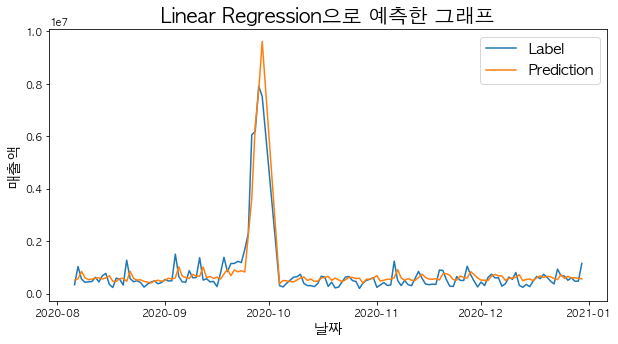

In [250]:
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.lineplot(x=plot_df.index, y='value', hue='kind', data=plot_df)
plt.title("Linear Regression으로 예측한 그래프", fontsize=20)
plt.xlabel("날짜", fontsize=15)
plt.ylabel("매출액", fontsize=15)
plt.legend(['Label', 'Prediction'], loc='upper right', prop={'size': 15})
plt.show()

#### 요일별로 예측

# Friday 일매출 예측!
# MAE:  255244원
 RMSE:  301864원


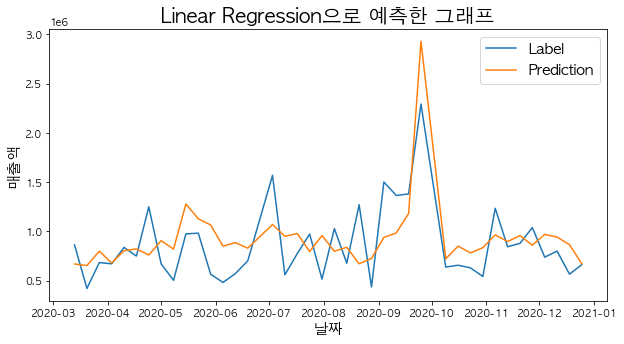

--------------------------------------------------
# Monday 일매출 예측!
# MAE:  171171원
 RMSE:  391084원


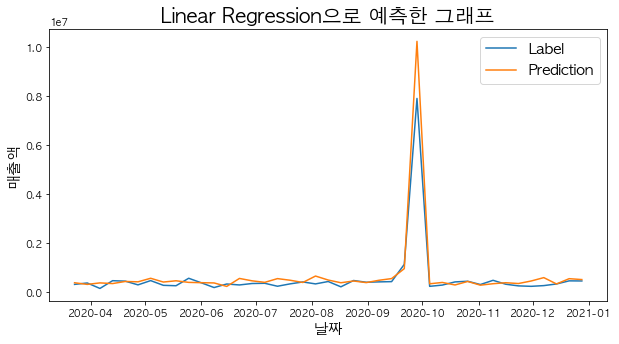

--------------------------------------------------
# Saturday 일매출 예측!
# MAE:  282998원
 RMSE:  659185원


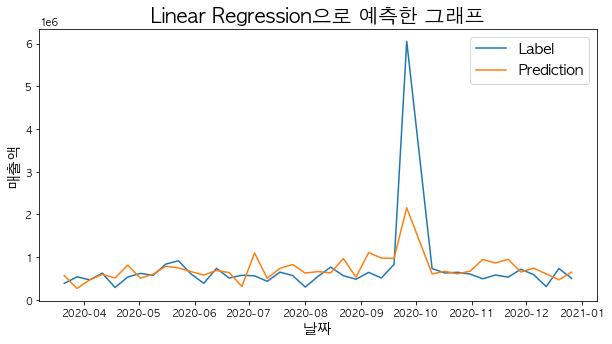

--------------------------------------------------
# Sunday 일매출 예측!
# MAE:  220239원
 RMSE:  269013원


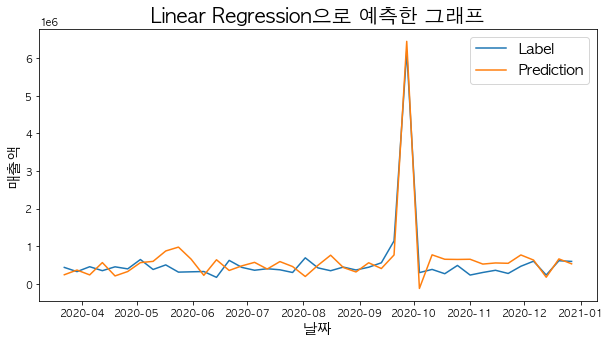

--------------------------------------------------
# Thursday 일매출 예측!
# MAE:  169811원
 RMSE:  235386원


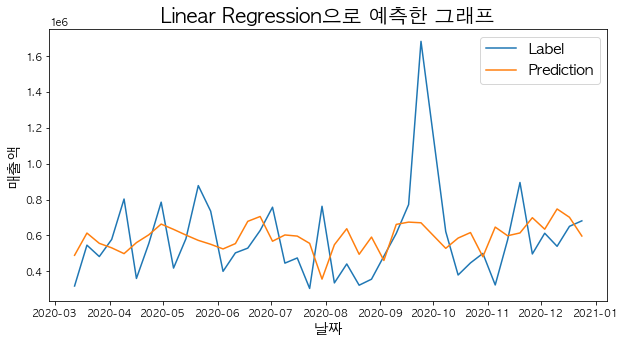

--------------------------------------------------
# Tuesday 일매출 예측!
# MAE:  194932원
 RMSE:  473709원


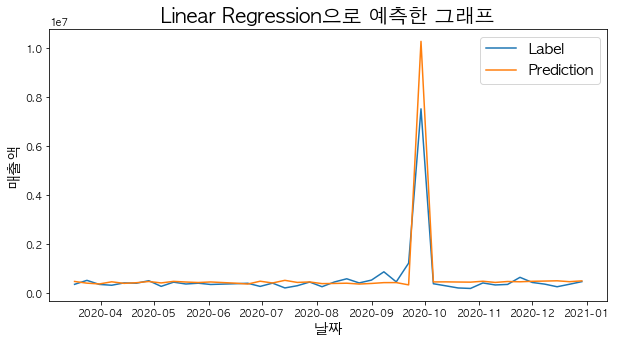

--------------------------------------------------
# Wednesday 일매출 예측!
# MAE:  176710원
 RMSE:  237958원


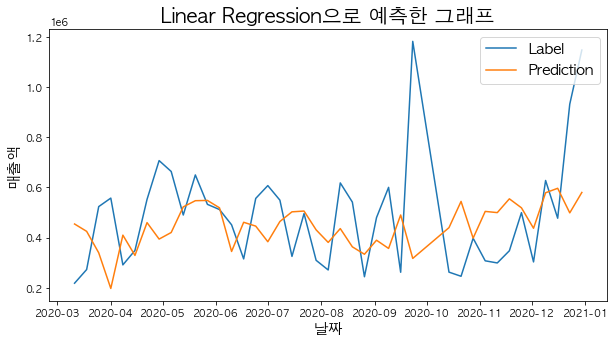

--------------------------------------------------


In [274]:
from sklearn.linear_model import LinearRegression

grouped = weekday_time.groupby('요일')
weekday_lst = list(grouped.groups.keys())
for i, g in enumerate(grouped.groups):
    group_df = grouped.get_group(g)
    # split data
    splits = math.floor(group_df.shape[0] * 0.90)
    train = group_df.iloc[:splits, :]
    test = group_df.iloc[splits:, :]

    # set X, y
    features = group_df.columns[2:-1]
    target = group_df.columns[-1]
    # set Train, Test
    X_train, y_train = train[features], train[target]
    X_test, y_test = test[features], test[target]
    
    # model
    lr_reg = LinearRegression()
    lr_reg.fit(X_train, y_train)
    # predict
    y_pred = lr_reg.predict(X_test)
    mae, rmse = get_metrics(y_test, y_pred)
    print(f"# {weekday_lst[i]} 일매출 예측!")
    print(f"# MAE: {mae : .0f}원\n RMSE: {rmse : .0f}원")
    plot_df = pd.DataFrame(data=test['날짜'])
    plot_df['y_true'] = y_test
    plot_df['y_pred'] = y_pred
    plot_df['날짜'] = pd.to_datetime(plot_df['날짜'])
    plot_df = plot_df.set_index('날짜')
    plot_df = pd.DataFrame(plot_df.stack()).reset_index().rename(columns={'level_1':'kind',
                                                                         0: 'value'}).set_index('날짜')
    plt.figure(figsize=(10, 5))
    sns.lineplot(x=plot_df.index, y='value', hue='kind', data=plot_df)
    plt.title("Linear Regression으로 예측한 그래프", fontsize=20)
    plt.xlabel("날짜", fontsize=15)
    plt.ylabel("매출액", fontsize=15)
    plt.legend(['Label', 'Prediction'], loc='upper right', prop={'size': 15})
    plt.show()
    print('-'*50)

In [275]:
# Scaling 후 모델이랑 비교해보기..